In [0]:
pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
print(tf.__version__) 

2.0.0


Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


extracted data here


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

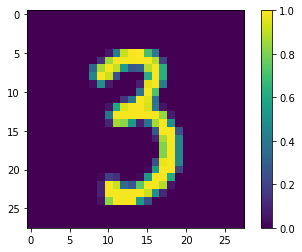

In [0]:
plt.imshow(x_train[98])
plt.colorbar()
plt.show()

In [0]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

Idk if i should convert my data to 3 dim or not

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

10000

building a model

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3),padding='same',activation='relu',input_shape = (28,28,1) ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding='same',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64,activation='relu',))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train,batch_size=5,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.6503 - accuracy: 0.7964 - val_loss: 0.0690 - val_accuracy: 0.9780
Epoch 2/10
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.3503 - accuracy: 0.8991 - val_loss: 0.0539 - val_accuracy: 0.9814
Epoch 3/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.3083 - accuracy: 0.9119 - val_loss: 0.0482 - val_accuracy: 0.9844
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.2824 - accuracy: 0.9209 - val_loss: 0.0452 - val_accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.2612 - accuracy: 0.9262 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 6/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.2503 - accuracy: 0.9297 - val_loss: 0.0395 - val_accuracy: 0.9869
Epoch 7/10
60000/60000 [==========================

In [0]:
history.history

{'accuracy': [0.7963667,
  0.8991167,
  0.9119167,
  0.92095,
  0.92616665,
  0.92966664,
  0.9343333,
  0.9356667,
  0.9356,
  0.9385833],
 'loss': [0.6503081165482872,
  0.3502718267691768,
  0.3083065456341234,
  0.2824133232923268,
  0.26119957942712546,
  0.2502503362931457,
  0.238367734507124,
  0.23048153080499953,
  0.23036464382256722,
  0.22396296401750684],
 'val_accuracy': [0.978,
  0.9814,
  0.9844,
  0.9851,
  0.9871,
  0.9869,
  0.9882,
  0.9891,
  0.9881,
  0.989],
 'val_loss': [0.0689997863101089,
  0.053920167973898966,
  0.0481587926886923,
  0.045203349157312916,
  0.04179919253503931,
  0.03949326608870933,
  0.038890547661361324,
  0.034071930268214375,
  0.03663965280200864,
  0.03628417443036278]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,11)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

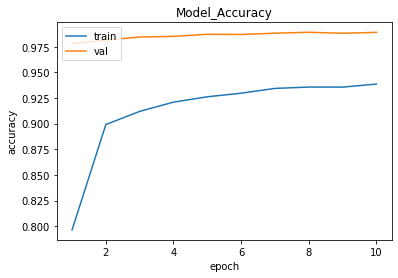

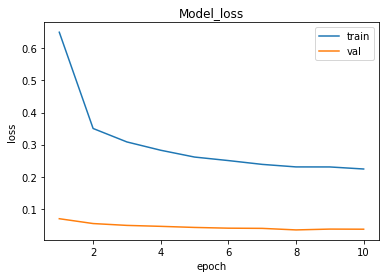

In [0]:
plot_curve(history)

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(28,28,1))  # changing resolution
  
  plt.imshow(img)
  plt.show()

  img = image.img_to_array(img)  # converting to numpy array
  img = img/255.0  # I know this, dont I?
  
  img = img.reshape(3,28,28,1)
  prdn = model.predict_classes(img)
  print(prdn)
  # classes = data.columns[2:] # 2nd column dekhi paxadi sab genres haru xan
  # prdn = model.predict(img)
  # top_prdn = np.argsort(prdn[0])[:-4:-1] # last ko 3 item dinxa, argsort ko last 3 elems chai max elements hunxan

  # print("the genre are:-")
  # for i in top_prdn:
  #   print(classes[i])

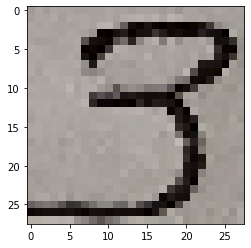

[1 1 1]


In [0]:
predict('three_r.jpg')

as we can see here the prediction isn't true cause I was not able to reshape img into(1,28,28,1) so i had to do(3,28,28,1). So it didnt predict properly. 

Checking with some testing dataset

In [0]:
a = x_test[8]

a = a.reshape(1,28,28,1)
a.shape

(1, 28, 28, 1)

In [0]:
new_prdn = model.predict_classes(a)
new_prdn,y_test[8]

(array([5]), 5)

hence we can see the model is working perfectly on testing dataset